### Thesis notebook to show descriptive analysis of post processing data and Linear Regression on the data with only Psychological Factors

In [111]:
# import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [137]:
# Import the dataset
data = pd.read_csv("Present Bias Conditions DF.csv")

data

,Age Group,Gender,Education,Ethnicity,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
0,3,0,5,4,4,2,10,9,10,9,8,2,1
1,2,0,5,5,6,2,7,10,9,7,8,1,1
2,2,1,3,5,4,2,6,8,8,8,7,1,1
3,2,2,3,1,5,2,10,10,10,10,10,2,0
4,1,2,5,5,5,2,10,10,10,10,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,5,5,3,2,10,10,10,10,6,3,0
182,1,2,3,5,3,2,8,10,7,10,7,2,1
183,1,0,4,5,6,2,10,8,8,8,7,2,1
184,4,2,4,5,6,2,10,6,6,6,10,3,0


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age Group                      186 non-null    int64
 1   Gender                         186 non-null    int64
 2   Education                      186 non-null    int64
 3   Ethnicity                      186 non-null    int64
 4   MFA Familiarity Count          186 non-null    int64
 5   Security Beliefs               186 non-null    int64
 6   Security Importance            186 non-null    int64
 7   Quick Log In Importance        186 non-null    int64
 8   Log In Usability Importance    186 non-null    int64
 9   Log In Convenience Importance  186 non-null    int64
 10  Log In Satisfaction            186 non-null    int64
 11  MFA Opt In Frequency           186 non-null    int64
 12  Present Bias                   186 non-null    int64
dtypes: int64(13)
memory 

In [139]:
data.describe()

,Age Group,Gender,Education,Ethnicity,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.00000,186.000000,186.000000
mean,1.677419,0.709677,3.913978,2.725806,4.596774,1.913978,9.365591,8.806452,8.833333,8.892473,8.27957,1.876344,0.666667
std,0.937637,0.953862,0.937575,1.861438,1.312637,0.349700,1.146416,1.550993,1.390767,1.444186,1.52362,0.812590,0.472677
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,3.000000,4.000000,3.00000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000,9.000000,8.000000,8.000000,8.000000,7.00000,1.000000,0.000000
50%,1.000000,0.000000,4.000000,2.000000,5.000000,2.000000,10.000000,9.000000,9.000000,9.000000,8.00000,2.000000,1.000000
75%,2.000000,2.000000,5.000000,5.000000,6.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.00000,2.750000,1.000000
max,6.000000,2.000000,5.000000,5.000000,6.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.00000,3.000000,1.000000


In [140]:
data.columns

Index(['Age Group', 'Gender', 'Education', 'Ethnicity',
       'MFA Familiarity Count', 'Security Beliefs', 'Security Importance',
       'Quick Log In Importance', 'Log In Usability Importance',
       'Log In Convenience Importance', 'Log In Satisfaction',
       'MFA Opt In Frequency', 'Present Bias'],
      dtype='object')

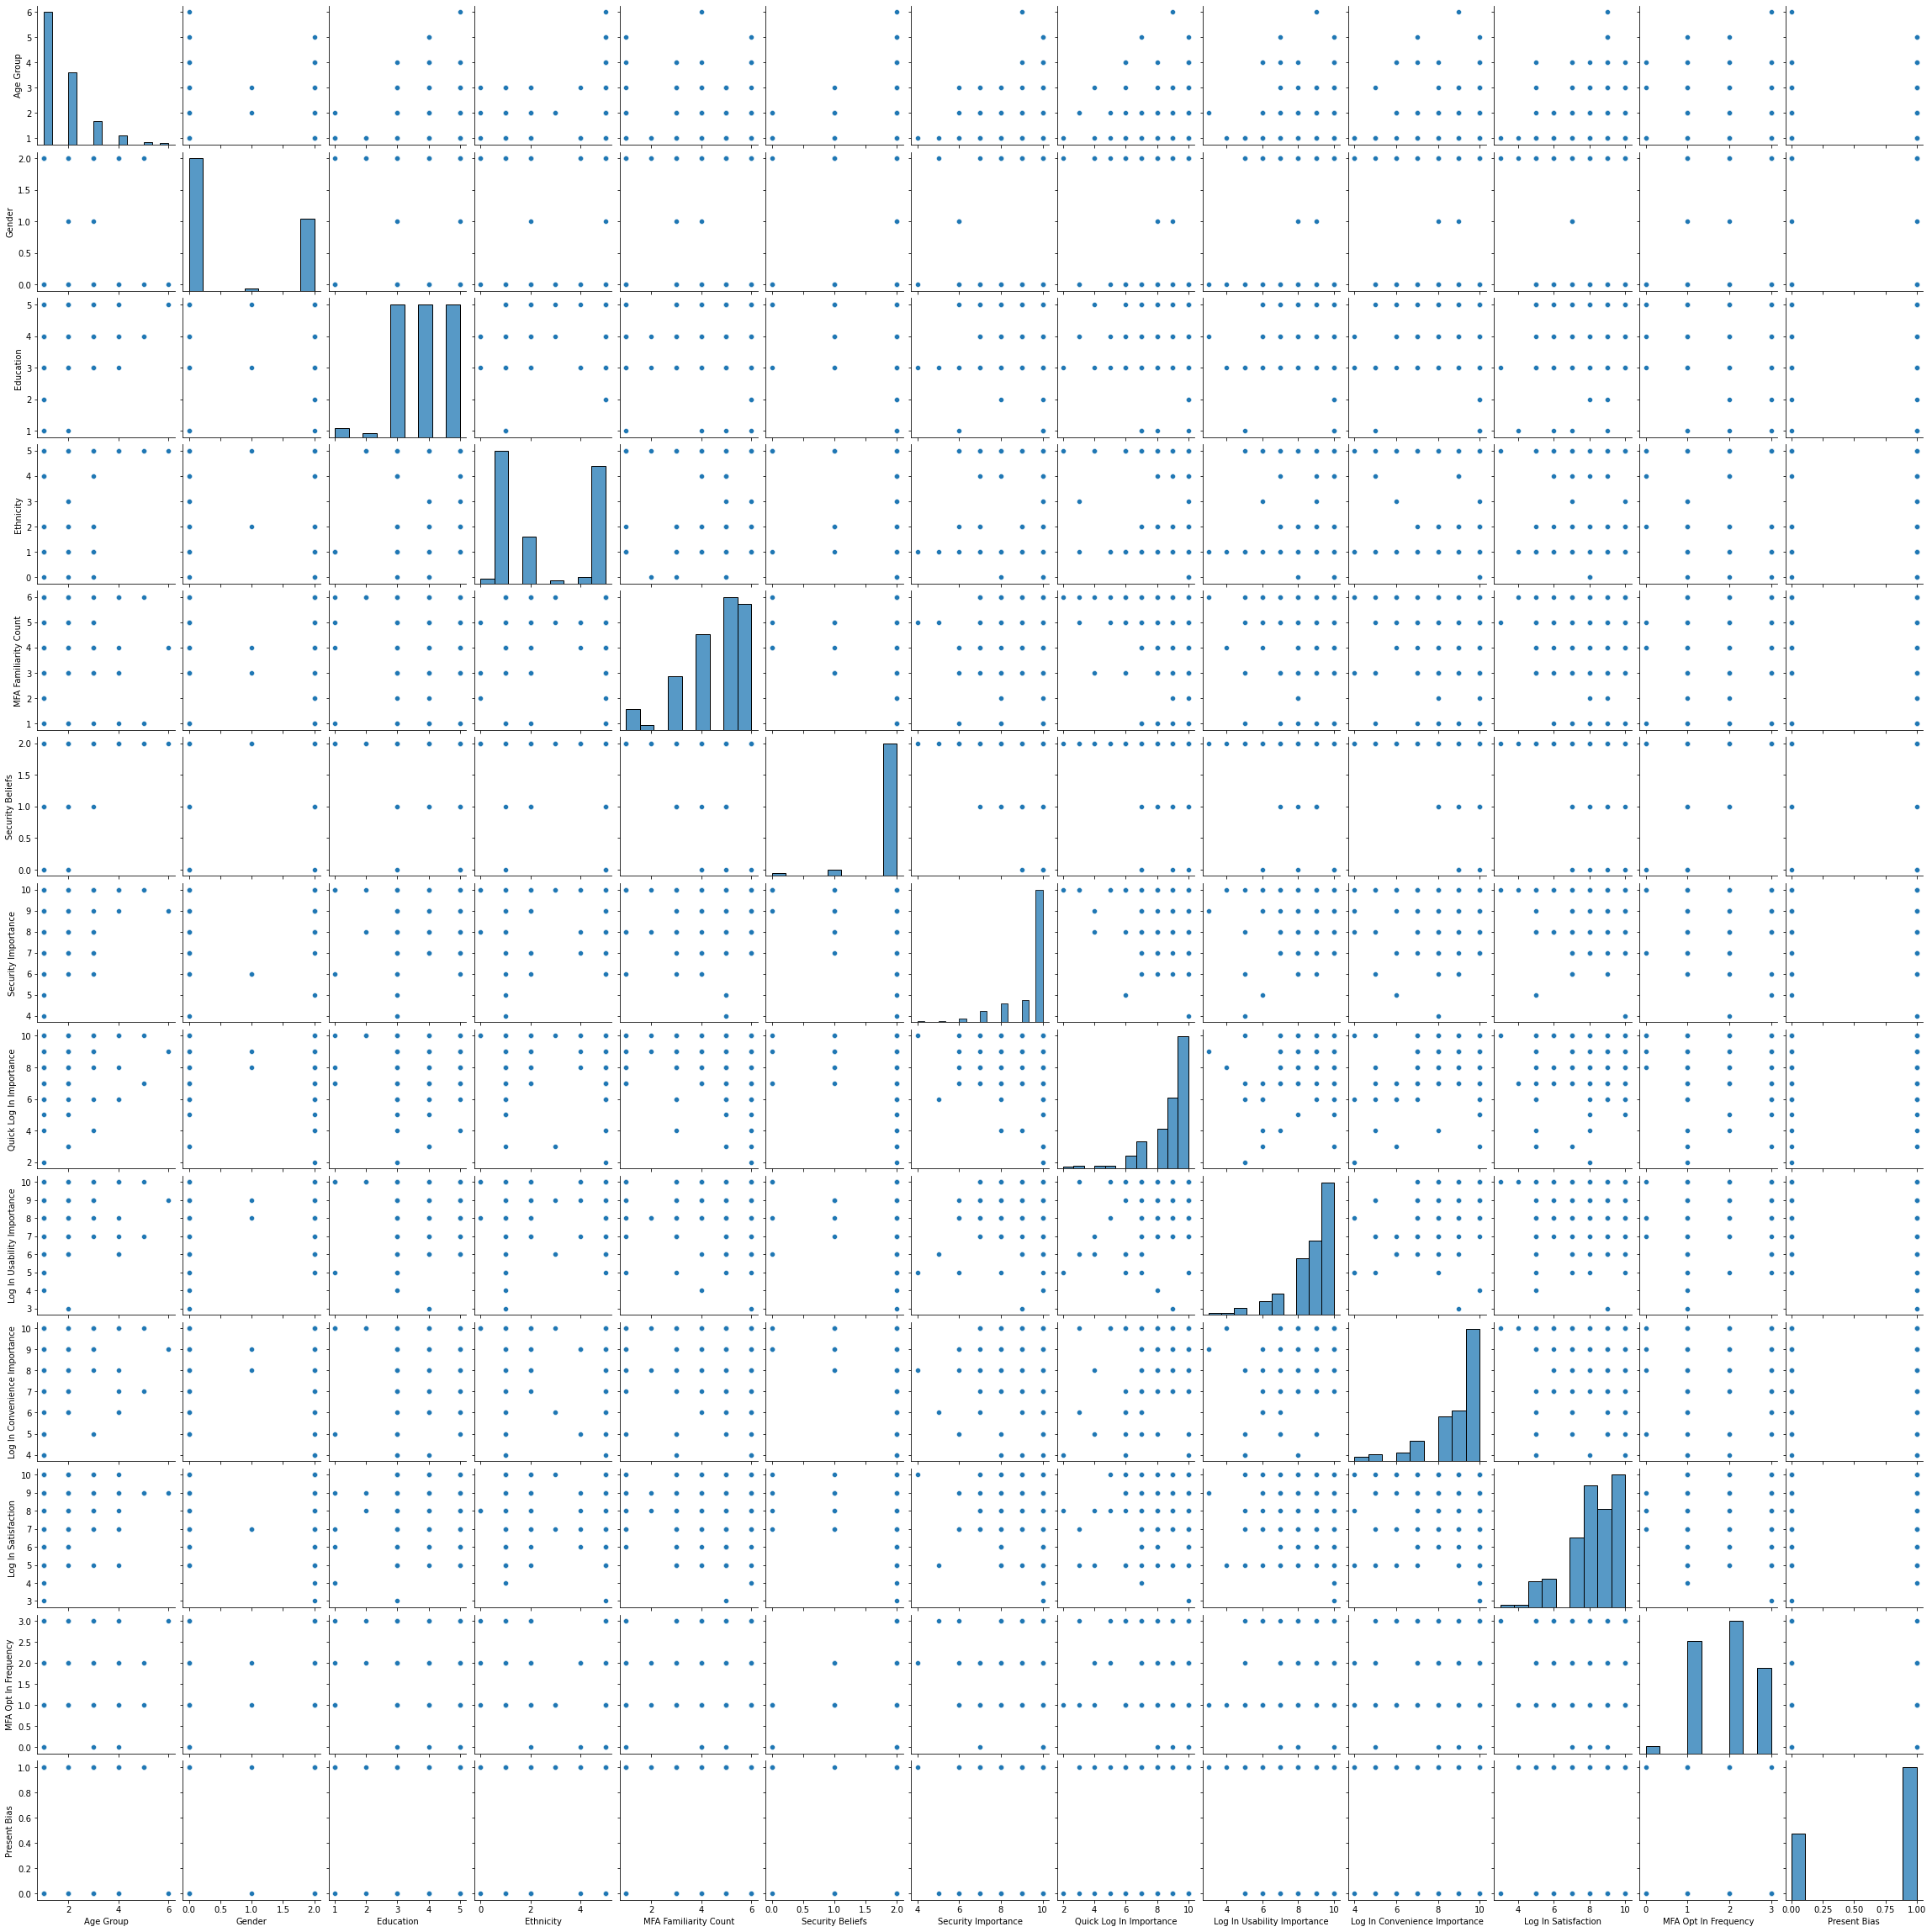

In [141]:
sns.pairplot(data)

/Users/darrelmschreiner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MFA Opt In Frequency', ylabel='Density'>

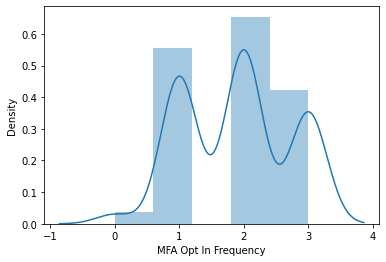

In [142]:
# distribution of the target
sns.distplot(data['MFA Opt In Frequency'])

<AxesSubplot:>

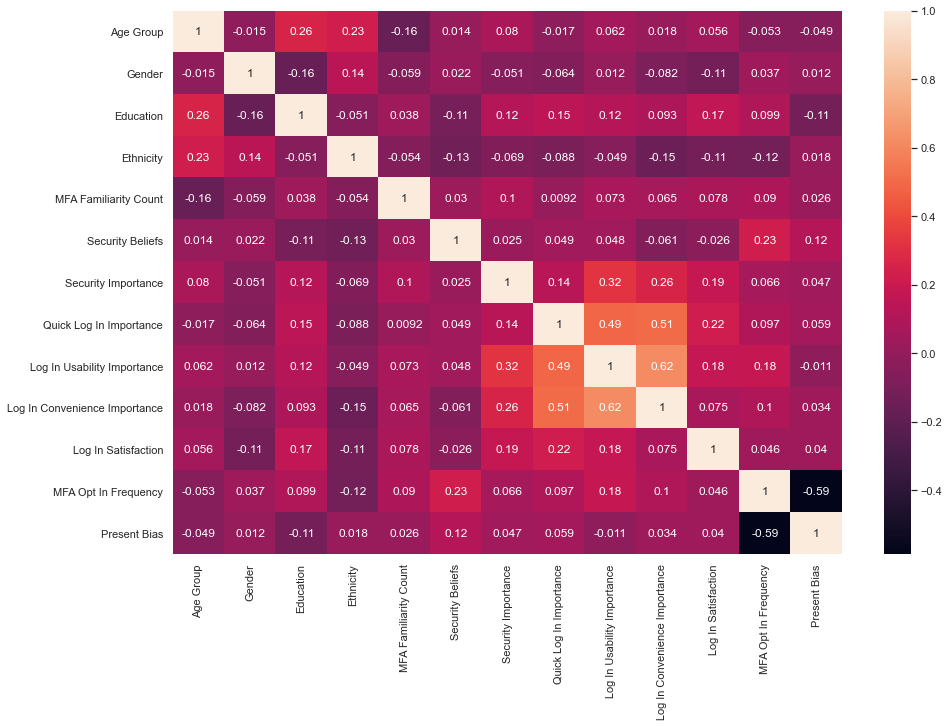

In [147]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot=True)

In [148]:
X = data[[
       'Security Beliefs', 'Security Importance',
       'Quick Log In Importance', 'Log In Usability Importance',
       'Log In Convenience Importance', 'Log In Satisfaction',
       'MFA Opt In Frequency']]

In [149]:
y = data['Present Bias']

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =101)

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
lm = LinearRegression()

In [154]:
lm.fit(X_train, y_train)

LinearRegression()

In [155]:
# print the intercept
print(lm.intercept_)

0.043462844363462705


In [156]:
lm.coef_

array([ 0.41681347,  0.0020139 ,  0.00391806,  0.00788637,  0.03595504,
        0.0162783 , -0.39886502])

In [157]:
X_train.columns

Index(['Security Beliefs', 'Security Importance', 'Quick Log In Importance',
       'Log In Usability Importance', 'Log In Convenience Importance',
       'Log In Satisfaction', 'MFA Opt In Frequency'],
      dtype='object')

In [158]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [159]:
cdf

,Coeff
Security Beliefs,0.416813
Security Importance,0.002014
Quick Log In Importance,0.003918
Log In Usability Importance,0.007886
Log In Convenience Importance,0.035955
Log In Satisfaction,0.016278
MFA Opt In Frequency,-0.398865


Interpreting the coefficients:

• Holding all other features fixed, a 1 unit increase in <b>Security Beliefs</b> is associated with an *increase of 0.416813 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Security Importance</b>	is associated with an *increase of 0.002014 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Quick Log In Importance</b>	is associated with an *increase of 0.003918 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Usability Importance</b>	is associated with an *increase of 0.007886 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Convenience Importance</b> is associated with an *increase of 0.035955 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>Log In Satisfaction</b>	is associated with an *increase of 0.016278 Present Bias*.

• Holding all other features fixed, a 1 unit increase in <b>MFA Opt In Frequency</b> is associated with an *decrease of 0.398865 Present Bias*.


In [166]:
predictions = lm.predict(X_test)
predictions # predictions of our model for Present Bias

array([0.22706337, 0.4275145 , 0.95346635, 0.34101148, 0.54437879,
       1.09443074, 0.34101148, 1.09041217, 0.13369528, 0.7398765 ,
       0.22272646, 1.13874151, 1.49900823, 0.28060615, 0.91912939,
       0.59552265, 0.69104159, 0.32473318, 1.00279365, 0.97720709,
       1.12246321, 0.68902769, 0.293252  , 1.05785557, 0.23219356,
       0.7235982 , 0.7235982 , 0.30845488, 1.08257605, 1.0027796 ,
       0.34101148, 1.08257605, 0.7235982 , 0.71179376, 0.98196793,
       0.62689408, 0.71571182, 0.7235982 ])

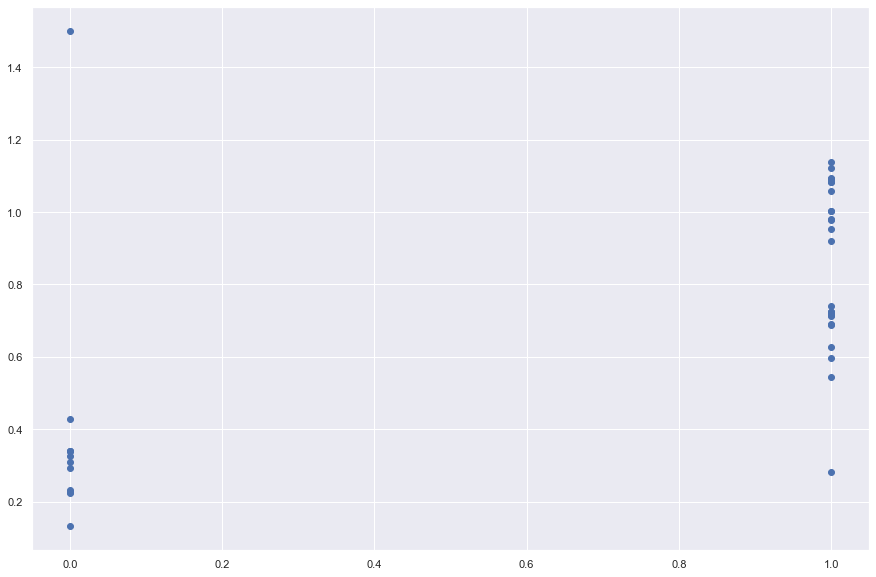

In [167]:
plt.scatter(y_test,predictions)

#### Residual Histogram

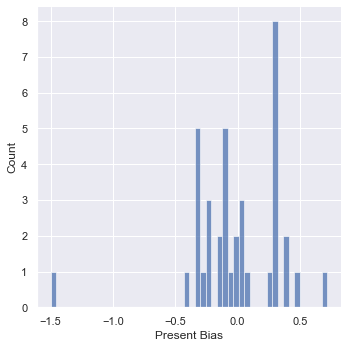

In [162]:
sns.displot((y_test-predictions), bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [163]:
from sklearn import metrics

In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.26434968098011513
MSE: 0.13350844994306388
RMSE: 0.36538808128216754


In [165]:
lm.score(X_test, y_test)

0.38209550731479414